# Building a Basic Chatbot with LangGraph

- Author: [r14minji](https://github.com/r14minji)
- Design: 
- Peer Review: 
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/99-TEMPLATE/00-BASE-TEMPLATE-EXAMPLE.ipynb) [![Open in GitHub](https://img.shields.io/badge/Open%20in%20GitHub-181717?style=flat-square&logo=github&logoColor=white)](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/99-TEMPLATE/00-BASE-TEMPLATE-EXAMPLE.ipynb)

## Overview

In this document, we explore how to build a simple chatbot using LangGraph, a framework that allows the creation of state machine-based chatbots. 
The process is broken down into manageable steps, covering key concepts like defining states, creating nodes, adding edges, compiling the graph, visualizing the chatbot structure, and finally executing the chatbot.

### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment-setup)
- [Step-by-Step: Understanding the Concepts](#step-by-step-understanding-the-concepts)
- [Complete Code](#complete-code)


### References

- [LangChain](https://blog.langchain.dev/)
- [LangGraph](https://www.langchain.com/langgraph)
----

## Environment Setup

Setting up your environment is the first step. See the [Environment Setup](https://wikidocs.net/257836) guide for more details.


**[Note]**

The langchain-opentutorial is a package of easy-to-use environment setup guidance, useful functions and utilities for tutorials.
Check out the  [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langsmith",
        "langgraph",
        "langchain_core",
        "langchain_openai",
    ],
    verbose=False,
    upgrade=False,
)

In [3]:
from dotenv import load_dotenv
from langchain_opentutorial import set_env

# Attempt to load environment variables from a .env file; if unsuccessful, set them manually.
if not load_dotenv():
    set_env(
        {
            "OPENAI_API_KEY": "",
            "LANGCHAIN_API_KEY": "",
            "LANGCHAIN_TRACING_V2": "true",
            "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
            "LANGCHAIN_PROJECT": "",  # set the project name same as the title
        }
    )

You can set API keys in a `.env` file or set them manually.

[Note] If you’re not using the `.env` file, no worries! Just enter the keys directly in the cell below, and you’re good to go.

In [4]:
# Load API keys from .env file
from dotenv import load_dotenv

load_dotenv(override=True)

True

## Step-by-Step: Understanding the Concepts

By following these steps, you will have a functional and clearly structured chatbot built with LangGraph!

### STEP 1. Defining the State

- We start by defining the state of the chatbot using Python's `TypedDict` . The state keeps track of messages, which are updated as the conversation progresses.

In [5]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Define messages (a list type, with the add_messages function used to append messages)
    messages: Annotated[list, add_messages]


### STEP 2. Defining the Nodes

- Add a "chatbot" node.
- Nodes represent individual units of work and are typically implemented as regular Python functions.

In [6]:
from langchain_openai import ChatOpenAI

# Define the LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# Define the chatbot function
def chatbot(state: State):
    # Invoke messages and return the result
    return {"messages": [llm.invoke(state["messages"])]}


### STEP 3. Defining the Graph and Add Nodes
- Create a graph and include the defined nodes.
- The "chatbot" node function takes the current State as input and returns a dictionary (`TypedDict` ) containing the updated list of messages under the key "messages".
- The `add_messages` function in the State appends the LLM's response to the existing messages in the state.

In [7]:
# Create the graph
graph_builder = StateGraph(State)

# Add a node by specifying its name and the associated function or callable object
graph_builder.add_node("chatbot", chatbot)

### STEP 4. Adding Graph Edges
- Define the flow of the graph by adding edges:
    - START: Specifies the entry point where the graph execution begins.
    - END: Marks the termination point of the graph's flow.

In [8]:
# Add an edge from the start node to the chatbot node
graph_builder.add_edge(START, "chatbot")

In [9]:
# Add an edge from the chatbot node to the end node
graph_builder.add_edge("chatbot", END)

### STEP 5. Compiling the Graph
- To execute the graph, call the `compile()` method using the graph builder.
- This generates a `CompiledGraph` , which can be invoked during runtime to process states.

In [10]:
# Compile the graph
graph = graph_builder.compile()

### STEP 6. Visualizing the Graph
- Visualizing the graph helps you understand its structure and how different nodes and edges are connected.

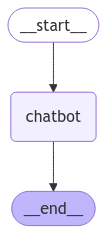

In [11]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

# Visualize the graph
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


### STEP 7. Running the Graph
- Let's run the chatbot with a sample question!

In [12]:
question = "Recommend the top 10 famous restaurants in New York"

# Stream the graph events
for event in graph.stream({"messages": [("user", question)]}):
    # Print the event values
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: New York City is home to a diverse and vibrant culinary scene, featuring a wide range of cuisines and dining experiences. Here are ten famous restaurants that are highly regarded and have made a significant impact on the city's dining landscape:

1. **Eleven Madison Park** - Known for its innovative plant-based tasting menu and exceptional service, this Michelin-starred restaurant offers a unique fine dining experience in a stunning Art Deco setting.

2. **Le Bernardin** - A celebrated French seafood restaurant, Le Bernardin is renowned for its elegant dishes and impeccable service. It has consistently received high accolades, including multiple Michelin stars.

3. **Peter Luger Steak House** - A Brooklyn institution since 1887, Peter Luger is famous for its no-frills approach to steak, serving some of the best dry-aged beef in the city.

4. **Katz's Delicatessen** - An iconic deli on the Lower East Side, Katz's is famous for its pastrami sandwiches and has been a beloved Ne

## Complete Code

This code provides the full process of creating a simple chatbot using LangGraph, including defining the state, nodes, edges, compiling the graph, visualizing it, and running it with a user query.

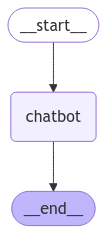

Assistant: New York City is home to a diverse and vibrant culinary scene, featuring a wide range of cuisines and dining experiences. Here are ten famous restaurants that are highly regarded and have made a significant impact on the city's food culture:

1. **Eleven Madison Park** - Known for its innovative plant-based tasting menu and exceptional service, this Michelin-starred restaurant offers a unique fine dining experience in a stunning Art Deco setting.

2. **Le Bernardin** - A celebrated French seafood restaurant, Le Bernardin is renowned for its elegant dishes and impeccable service. It has consistently received high accolades, including multiple Michelin stars.

3. **Katz's Delicatessen** - An iconic deli famous for its pastrami sandwiches, Katz's has been a staple of New York's culinary scene since 1888. It's a must-visit for a classic New York experience.

4. **Peter Luger Steak House** - Established in 1887, this legendary steakhouse in Williamsburg is famous for its no-frill

In [13]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

# STEP 1: Define the State
class State(TypedDict):
    # Define messages (a list type, with the add_messages function used to append messages)
    messages: Annotated[list, add_messages]

# STEP 2: Define the LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# STEP 3: Define the chatbot function
def chatbot(state: State):
    # Invoke messages and return the result
    return {"messages": [llm.invoke(state["messages"])]}

# STEP 4: Create the graph
graph_builder = StateGraph(State)

# STEP 5: Add nodes
graph_builder.add_node("chatbot", chatbot)

# STEP 6: Add edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# STEP 7: Compile the graph
graph = graph_builder.compile()

# STEP 8: Visualize the graph
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

# STEP 9: Run the graph with a sample question
question = "Recommend the top 10 famous restaurants in New York"

# Stream the graph events
for event in graph.stream({"messages": [("user", question)]}):
    # Print the event values
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)